In [9]:
import os
def load_data(image_folder_1, image_folder_2, label_folder_1, label_folder_2, train_split=0.8, shuffle=True):
    # Load image filenames
    image_filenames = os.listdir(image_folder_1) + os.listdir(image_folder_2)
    print(image_filenames[0])
    # Load label filenames
    label_filenames = os.listdir(label_folder_1) + os.listdir(label_folder_2)
    print(label_filenames[0])
    # Sort filenames to ensure correspondence between images and labels
    image_filenames.sort()
    label_filenames.sort()
    # Load images and labels as arrays
    images = []
    labels = []
    for image_filename, label_filename in zip(image_filenames, label_filenames):
         if('redfe' in image_filename):
            image_path = os.path.join(image_folder_2, image_filename)
            label_path = os.path.join(label_folder_2, label_filename)
            print(image_path, label_path)
            break
    #     print(label_path)
    #     break
image_folder_1 = "/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/triplets_cnn/data/dummies_aug"
label_folder_1 = "/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/triplets_cnn/data/dummies_label_aug"
image_folder_2 = "/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/triplets_cnn/data/redfe_aug"
label_folder_2 = "/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/triplets_cnn/data/redfe_label_aug"
load_data(image_folder_1,image_folder_2, label_folder_1, label_folder_2)

dummy_131924.jpg
dummy_cross_center_coords_138266.npy
/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/triplets_cnn/data/redfe_aug/redfe_01.jpg /mnt/project_mnt/atlas/atlas_gen_fs/vannolil/triplets_cnn/data/redfe_label_aug/redfe_cross_center_coords_01.npy


In [10]:
a = [1,2,3,4,5]
b = [6,7,8,9]
for i in zip(a,b):
    print(i)

(1, 6)
(2, 7)
(3, 8)
(4, 9)


In [24]:
def plot_image(img, label):
    print(img, label)
    im = Image.open(img)
    center_coords = np.load(label)
    center_coords = center_coords.reshape(1,2)
    print(center_coords.shape)
    x = center_coords[0][0]
    y = center_coords[0][1]
    _, ax = plt.subplots(figsize=(8,8))
    ax.imshow(im)
    plt.title(img.split('/')[-1][:-4])
    plt.plot(x,y,f'rs',markersize=3)
    plt.draw()
    plt.show()

[[353]
 [174]]
(1, 2)
174
/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/triplets_cnn/data/test/redfe_03.jpg /mnt/project_mnt/atlas/atlas_gen_fs/vannolil/triplets_cnn/data/test/redfe_cross_center_coords_03.npy
(1, 2)


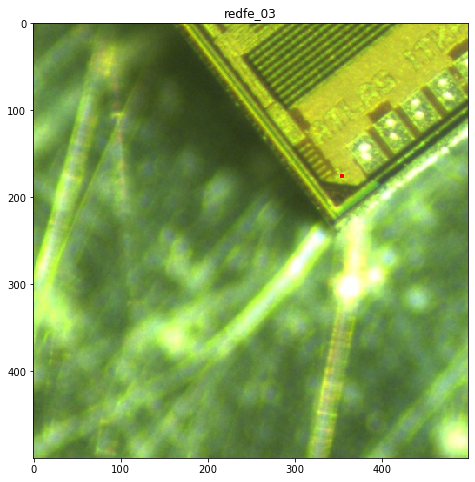

In [25]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
test_image_folder = "/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/triplets_cnn/data/test/"
image = "redfe_03.jpg"
test_image_path = test_image_folder+image
dot = np.load("/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/triplets_cnn/data/test/redfe_cross_center_coords_03.npy")
print(dot)
dot = dot.reshape(1,2)
print(dot.shape)
print(dot[0][1])
plot_image(test_image_path, "/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/triplets_cnn/data/test/redfe_cross_center_coords_03.npy")

In [5]:
import numpy as np
from PIL import Image
import os

In [6]:
# Load image filenames
image_filenames = os.listdir(image_folder_dummy) + os.listdir(image_folder_redfe)
# Load label filenames
label_filenames = os.listdir(label_folder_dummy) + os.listdir(label_folder_redfe)
# Sort filenames to ensure correspondence between images and labels
image_filenames.sort()
label_filenames.sort()
# Load images and labels as arrays
images = []
labels = []

In [7]:
image_folder_dummy = "/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/triplets_cnn/data/dummies_onlyrot"
label_folder_dummy = "/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/triplets_cnn/data/dummies_label_onlyrot"
image_folder_redfe = "/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/triplets_cnn/data/redfe_onlyrot"
label_folder_redfe = "/mnt/project_mnt/atlas/atlas_gen_fs/vannolil/triplets_cnn/data/redfe_label_onlyrot"
for image_filename, label_filename in zip(image_filenames, label_filenames):
    if('dummy' in image_filename):
        image_path = os.path.join(image_folder_dummy, image_filename)
        label_path = os.path.join(label_folder_dummy, label_filename)
    elif('redfe' in image_filename):
        image_path = os.path.join(image_folder_redfe, image_filename)
        label_path = os.path.join(label_folder_redfe, label_filename)
    image = Image.open(image_path)
    label = np.load(label_path)
    images.append(np.array(image))
    labels.append(label.reshape(1, 2))
    
images = np.array(images)
images = np.divide(images, 255.)
labels = np.array(labels)/500.

: 

: 

In [ ]:
train_split = 0.8
# Shuffle data
if shuffle:
    indices = np.arange(len(images))
    np.random.shuffle(indices)
    images = images[indices]
    labels = labels[indices]

# Split data into training and validation sets
split_index = int(train_split * len(images))
train_images = images[:split_index]
train_labels = labels[:split_index]
val_images = images[split_index:]
val_labels = labels[split_index:]
np.save('train_images.npy', train_images)
np.save('train_labels.npy', train_labels)
np.save('val_images.npy', val_images)
np.save('val_labels.npy', val_labels)